### DSAI kaggle competition - Decoding Gaming Trends

Explore a comprehensive dataset covering the latest gaming industry trends, including game sales, platform popularity, player behavior to predict the revenue.

[Link to the competition](https://www.kaggle.com/competitions/decoding-gaming-trends)

### DAY 1

**Today's goals:**
- Basic understanding of the dataset
- Data cleaning
- Data preprocessing (maybe! if i get time)


### Let's get familiar with the dataset

#### Importing the necessary libraries

we will start by importing the necessary libraries and loading the dataset

- **pandas** - for data manipulation and analysis
- **numpy** - for numerical computation
- **matplotlib, seaborn** - for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

Let's load the dataset from the csv files.

In [57]:
dataframe = pd.read_csv('train.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               900 non-null    object 
 1   Genre                    900 non-null    object 
 2   Platform                 900 non-null    object 
 3   Release Year             900 non-null    int64  
 4   Developer                900 non-null    object 
 5   Revenue (Millions $)     900 non-null    float64
 6   Players (Millions)       900 non-null    float64
 7   Peak Concurrent Players  900 non-null    float64
 8   Metacritic Score         900 non-null    int64  
 9   Esports Popularity       900 non-null    object 
 10  Trending Status          900 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 77.5+ KB


### We can see that the given dataset contains:
- 900 rows and 11 columns
- No null values in any of the columns
- We have to predict the **Revenue (Millions $)** column


### Lets check for the duplicate values in the dataset

In [7]:
dataframe.duplicated().sum()

np.int64(0)

there are no duplicate values in the dataset!

We've a very clean dataset to work with. Let's move on to the next step and analyze the data further.

In [9]:
dataframe.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Battle Warriors 3,RPG,Xbox,2000,Sony,3928.96,33.84,12.00,96,No,Declining
1,Pixel Odyssey 5,Adventure,Cross-Platform,2013,Ubisoft,1304.97,162.57,37.76,91,Yes,Stable
2,Fantasy Rivals 2,Shooter,PC,2007,Sony,2690.57,164.85,70.99,85,No,Rising
3,Pixel Odyssey 1,Action,PC,2023,Microsoft,653.18,118.68,41.95,88,Yes,Stable
4,Shadow Realms 2,Action,Nintendo Switch,2016,Ubisoft,3157.66,64.07,17.56,84,Yes,Stable


### The dataset contains the following columns:

- **Game Title** - Name of the game
- **Genre** - Genre of the game
- **Platform** - Platform on which the game is available
- **Release Year** - Year in which the game was released
- **Developer** - Name of the developer
- **Revenue (Millions $)** - Revenue generated by the game in millions of dollars
- **Players (Millions)** - Number of players in millions
- **Peak Concurrent Players** - Peak number of players playing the game at the same time
- **Metacritic Score** - Metacritic score of the game
- **Esports Popularity** - Whether the game is popular in esports or not
- **Trending Status** - Trending status of the game

### Let's explore each of these columns further to understand the data better.


### Exploring genre 

<Axes: xlabel='Genre'>

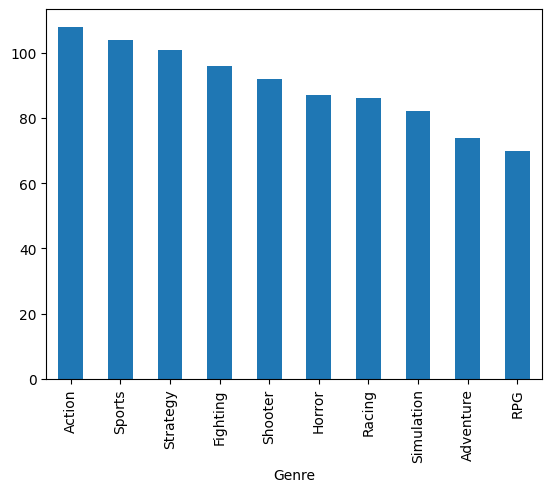

In [13]:
dataframe['Genre'].value_counts().plot(kind='bar')

In [28]:
dataframe.groupby('Genre')['Revenue (Millions $)'].sum().sort_values(ascending=False)

Genre
Fighting      260472.90
Action        253080.10
Strategy      248335.76
Sports        236733.34
Shooter       224189.80
Horror        217014.78
Simulation    214066.34
Racing        211881.64
RPG           186803.21
Adventure     171796.13
Name: Revenue (Millions $), dtype: float64

### Observations:
- The dataset contains 10 unique genres
- The most popular genre is **Action** with 108 games
- The least popular genre is **RPG** with 70 games
- The genre **Fighting** has generated the highest revenue of 260472.90 million dollars
- The genre **Adventure** has generated the lowest revenue of 171796.13 million dollars

This observation gives us a good idea about the distribution of games across different genres and their revenue generation.



### Exploring platform

In [29]:
dataframe["Platform"].value_counts()

Platform
PlayStation        160
PC                 160
Cross-Platform     150
Xbox               150
Nintendo Switch    142
Mobile             138
Name: count, dtype: int64

<Axes: xlabel='Platform'>

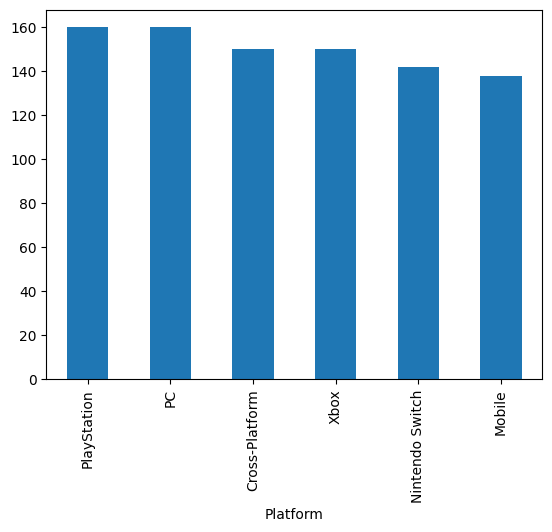

In [30]:
dataframe["Platform"].value_counts().plot(kind='bar')

In [31]:
dataframe.groupby('Platform')['Revenue (Millions $)'].sum().sort_values(ascending=False)

Platform
PC                 389032.06
PlayStation        376249.60
Cross-Platform     373888.97
Xbox               373624.48
Nintendo Switch    362336.32
Mobile             349242.57
Name: Revenue (Millions $), dtype: float64


### Observations:
- The dataset contains 6 unique platforms
- The most popular platforms are **PlayStation** and **PC** with 160 games each
- The least popular platform is **Mobile** with 138 games
- The platform **PC** has generated the highest revenue of 389032.06 million dollars
- The platform **Mobile** has generated the lowest revenue of 349242.57 million dollars

We can see that the revenue generated by different platforms varies significantly. This information will be useful for our analysis.

### Exploring Release Year

In [34]:
dataframe["Release Year"].value_counts()

Release Year
2006    47
2018    45
2009    41
2010    41
2020    40
2019    39
2017    39
2001    39
2005    38
2014    37
2023    37
2003    37
2022    36
2013    36
2016    36
2015    35
2011    35
2004    34
2012    34
2008    34
2007    30
2021    30
2002    28
2000    26
2024    26
Name: count, dtype: int64

<Axes: xlabel='Release Year'>

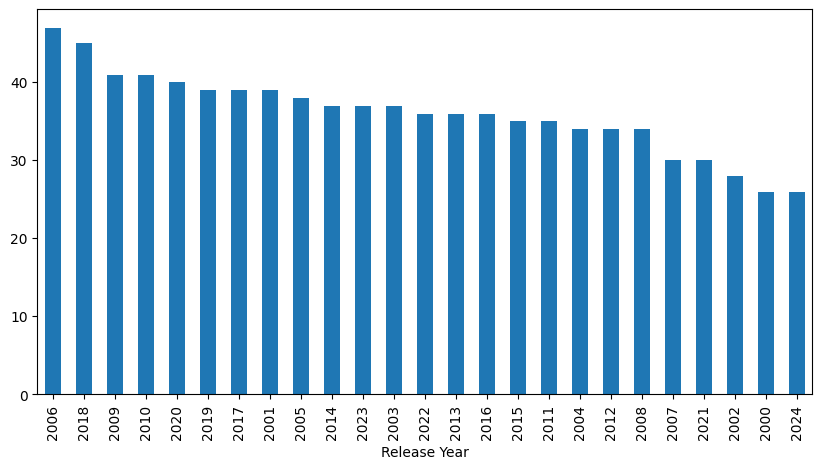

In [37]:
plt.figure(figsize=(10,5))
dataframe["Release Year"].value_counts().plot(kind='bar')

In [35]:
dataframe.groupby('Release Year')['Revenue (Millions $)'].sum().sort_values(ascending=False)

Release Year
2018    116716.54
2009    108316.83
2001    105374.66
2020    104614.21
2017    104320.11
2019    101027.46
2013     99558.32
2006     97441.38
2016     95554.38
2010     95124.99
2005     89049.02
2004     88678.42
2023     87779.77
2003     87529.24
2008     85625.42
2014     83346.69
2015     81978.03
2021     81203.73
2007     80491.65
2011     79907.90
2022     79615.52
2012     75998.05
2000     73284.20
2024     66552.86
2002     55284.62
Name: Revenue (Millions $), dtype: float64

### Observations:
- The dataset contains games released from the year 2000 to 2024
- The year **2006** has the highest number of games with 47 games
- The years **2000** and **2024** have the lowest number of games with 26 games each
- The year **2018** has the highest revenue of 116716.54 million dollars
- The year **2002** has the lowest revenue of 55284.62 million dollars

This information gives us an idea about the distribution of games across different years and their revenue generation. We can see that the revenue generated by games varies significantly across different years. 


### Exploring Developer

In [38]:
dataframe["Developer"].value_counts()

Developer
Sony            105
Activision      100
Rockstar         98
Ubisoft          95
Microsoft        95
Nintendo         84
Square Enix      82
Capcom           82
EA               81
Bandai Namco     78
Name: count, dtype: int64

<Axes: xlabel='Developer'>

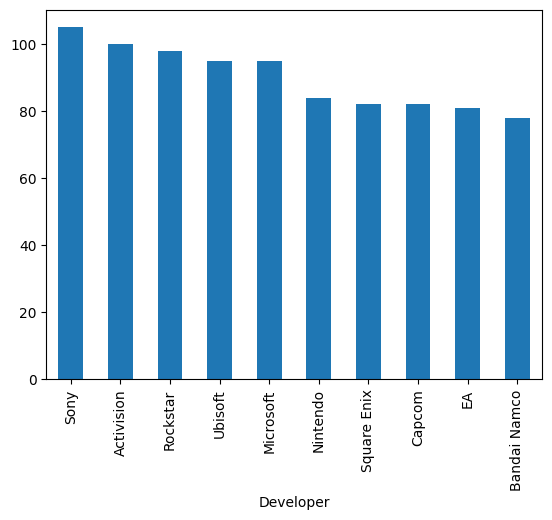

In [39]:
dataframe["Developer"].value_counts().plot(kind='bar')

In [40]:
dataframe.groupby('Developer')['Revenue (Millions $)'].sum().sort_values(ascending=False)

Developer
Sony            279806.35
Activision      256851.45
Rockstar        231348.18
Microsoft       225213.40
Capcom          223116.66
Nintendo        219411.23
Ubisoft         211665.26
EA              198245.79
Square Enix     189741.66
Bandai Namco    188974.02
Name: Revenue (Millions $), dtype: float64

<!-- Developer
Sony            105
Activision      100
Rockstar         98
Ubisoft          95
Microsoft        95
Nintendo         84
Square Enix      82
Capcom           82
EA               81
Bandai Namco     78
Name: count, dtype: int64 -->

<!-- Developer
Sony            279806.35
Activision      256851.45
Rockstar        231348.18
Microsoft       225213.40
Capcom          223116.66
Nintendo        219411.23
Ubisoft         211665.26
EA              198245.79
Square Enix     189741.66
Bandai Namco    188974.02
Name: Revenue (Millions $), dtype: float64 -->

### Observations:
- The dataset contains games developed by 10 unique developers
- **Sony** has the highest number of games with 105 games
- **Bandai Namco** has the lowest number of games with 78 games
- **Sony** has generated the highest revenue of 279806.35 million dollars
- **Bandai Namco** has generated the lowest revenue of 188974.02 million dollars

The games developed by popular developers like **Sony**, **Activision**, **Rockstar** are more likely to generate higher revenue. This information will be useful for our analysis.


### Exploring Players

In [46]:
dataframe["Players (Millions)"].describe()

count    900.000000
mean     103.669122
std       58.982066
min        0.530000
25%       52.375000
50%      107.865000
75%      155.900000
max      199.980000
Name: Players (Millions), dtype: float64

### Observations:

- The dataset contains games with players ranging from 0.53 million to 199.98 million
- The average number of players is 103.67 million
- The median number of players is 107.87 million
- The minimum number of players is 0.53 million
- The maximum number of players is 199.98 million

This is a very interesting observation as it shows that there are games with very few players as well as games with a large number of players. This could be an important factor in predicting the revenue generated by the game.

### Exploring Peak Concurrent Players

In [47]:
dataframe["Peak Concurrent Players"].describe()

count    900.000000
mean      31.629344
std       23.170966
min        0.110000
25%       12.897500
50%       26.215000
75%       46.302500
max       96.620000
Name: Peak Concurrent Players, dtype: float64

### Observations:

- The dataset contains games with peak concurrent players ranging from 0.11 to 96.62
- The average peak concurrent players is 31.63
- The median peak concurrent players is 26.22
- The minimum peak concurrent players is 0.11
- The maximum peak concurrent players is 96.62

We can see that the peak concurrent players are varying significantly across different games. Games with a higher number of peak concurrent players are more likely to generate higher revenue.

### Exploring Metacritic Score

In [48]:
dataframe["Metacritic Score"].describe()

count    900.000000
mean      75.213333
std       14.701291
min       50.000000
25%       62.000000
50%       76.500000
75%       88.000000
max      100.000000
Name: Metacritic Score, dtype: float64

### Observations:

- The dataset contains games with Metacritic scores ranging from 50 to 100
- The average Metacritic score is 75.21
- The median Metacritic score is 76.50
- The minimum Metacritic score is 50
- The maximum Metacritic score is 100

Higher Metacritic scores are generally associated with better quality games. Games with higher Metacritic scores are more likely to generate higher revenue.

### Exploring Esports Popularity

In [49]:
dataframe["Esports Popularity"].value_counts()

Esports Popularity
Yes    456
No     444
Name: count, dtype: int64

In [50]:
dataframe.groupby('Esports Popularity')['Revenue (Millions $)'].sum().sort_values(ascending=False)

Esports Popularity
Yes    1139275.65
No     1085098.35
Name: Revenue (Millions $), dtype: float64

### Observations:

- The dataset contains games with and without esports popularity
- There are 456 games with esports popularity and 444 games without esports popularity
- Games with esports popularity have generated a revenue of 1139275.65 million dollars
- Games without esports popularity have generated a revenue of 1085098.35 million dollars

Games with esports popularity are more likely to generate higher revenue compared to games without esports popularity.

### Exploring Trending Status

In [51]:
dataframe["Trending Status"].value_counts()

Trending Status
Rising       307
Stable       306
Declining    287
Name: count, dtype: int64

In [52]:
dataframe.groupby('Trending Status')['Revenue (Millions $)'].sum().sort_values(ascending=False)

Trending Status
Rising       775509.78
Stable       758346.20
Declining    690518.02
Name: Revenue (Millions $), dtype: float64

### Observations:

- The dataset contains games with different trending statuses - Rising, Stable, Declining
- There are 307 games with a rising trend, 306 games with a stable trend, and 287 games with a declining trend
- Games with a rising trend have generated a revenue of 775509.78 million dollars
- Games with a stable trend have generated a revenue of 758346.20 million dollars
- Games with a declining trend have generated a revenue of 690518.02 million dollars

Trending status is an important factor in predicting the revenue generated by the game. Games with a rising trend are more likely to generate higher revenue compared to games with a stable or declining trend.

### Data Preprocessing

### First lets rename the columns for better understanding

In [58]:
dataframe.rename(columns={'Game Title':'Game_Title', 'Release Year':'Release_Year', 'Revenue (Millions $)':'Revenue_Millions', 'Players (Millions)':'Players_Millions', 'Peak Concurrent Players':'Peak_Concurrent_Players', 'Metacritic Score':'Metacritic_Score', 'Esports Popularity':'Esports_Popularity', 'Trending Status':'Trending_Status'}, inplace=True)

In [59]:
dataframe.head()

,Game_Title,Genre,Platform,Release_Year,Developer,Revenue_Millions,Players_Millions,Peak_Concurrent_Players,Metacritic_Score,Esports_Popularity,Trending_Status
0,Battle Warriors 3,RPG,Xbox,2000,Sony,3928.96,33.84,12.00,96,No,Declining
1,Pixel Odyssey 5,Adventure,Cross-Platform,2013,Ubisoft,1304.97,162.57,37.76,91,Yes,Stable
2,Fantasy Rivals 2,Shooter,PC,2007,Sony,2690.57,164.85,70.99,85,No,Rising
3,Pixel Odyssey 1,Action,PC,2023,Microsoft,653.18,118.68,41.95,88,Yes,Stable
4,Shadow Realms 2,Action,Nintendo Switch,2016,Ubisoft,3157.66,64.07,17.56,84,Yes,Stable


### Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoders = {}
labels = ['Genre', 'Platform', 'Developer', 'Esports_Popularity', 'Trending_Status']
for label in labels:
    labelencoders[label] = LabelEncoder()
    dataframe[label] = labelencoders[label].fit_transform(dataframe[label])

dataframe.head()



,Game_Title,Genre,Platform,Release_Year,Developer,Revenue_Millions,Players_Millions,Peak_Concurrent_Players,Metacritic_Score,Esports_Popularity,Trending_Status
0,Battle Warriors 3,4,5,2000,7,3928.96,33.84,12.00,96,0,0
1,Pixel Odyssey 5,1,0,2013,9,1304.97,162.57,37.76,91,1,2
2,Fantasy Rivals 2,6,3,2007,7,2690.57,164.85,70.99,85,0,1
3,Pixel Odyssey 1,0,3,2023,4,653.18,118.68,41.95,88,1,2
4,Shadow Realms 2,0,2,2016,9,3157.66,64.07,17.56,84,1,2


### Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_columns = ['Revenue_Millions', 'Players_Millions', 'Peak_Concurrent_Players', 'Metacritic_Score']
dataframe[numerical_columns] = scaler.fit_transform(dataframe[numerical_columns])

dataframe.head()

,Game_Title,Genre,Platform,Release_Year,Developer,Revenue_Millions,Players_Millions,Peak_Concurrent_Players,Metacritic_Score,Esports_Popularity,Trending_Status
0,Battle Warriors 3,4,5,2000,7,1.031859,-1.184563,-0.847624,1.414721,0,0
1,Pixel Odyssey 5,1,0,2013,9,-0.825919,0.999179,0.264731,1.074426,1,2
2,Fantasy Rivals 2,6,3,2007,7,0.155082,1.037856,1.699650,0.666071,0,1
3,Pixel Odyssey 1,0,3,2023,4,-1.287385,0.254641,0.445661,0.870248,1,2
4,Shadow Realms 2,0,2,2016,9,0.485781,-0.671749,-0.607535,0.598012,1,2


In [62]:
from sklearn.model_selection import train_test_split

X = dataframe.drop(['Game_Title', 'Revenue_Millions'], axis=1)
y = dataframe['Revenue_Millions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

0.9871837375186797
